# Run Generic Automated EAS tests
This is a starting-point notebook for running tests from the generic EAS suite in `tests/eas/generic.py`. The test classes that are imported here provide helper methods to aid analysis of the cause of failure. You can use Python's `help` built-in to find those methods (or you can just read the docstrings in the code).

These tests make estimation of the energy efficiency of task placements, without directly examining the behaviour of cpufreq or cpuidle. Several test classes are provided, the only difference between them being the workload that is used.

### Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging
from conf import LisaLogging
LisaLogging.setup()
logging.getLogger().setLevel(logging.ERROR) # ixnay on the ogginglay

import pandas as pd

from perf_analysis import PerfAnalysis

import trappy
from trappy import ILinePlot
from trappy.stats.grammar import Parser

2016-12-21 15:44:32,999 INFO    : root         : Using LISA logging configuration:
2016-12-21 15:44:33,000 INFO    : root         :   /home/brejac01/sources/lisa/logging.conf


## Run test workload

See `tests/eas/generic.py` for details of the available tests. To run different tests, simply change the constructor call that assigns to `t` and then run the remaining cells below. 

If you simply want to run all the tests and get pass/fail results, use this command in the LISA shell: `lisa-test tests/eas/generic.py`. This notebook is intended as a starting point for analysing what scheduler behaviour caused a failure.

Target configuration is taken from `$LISA_HOME/target.config` - you'll need to edit that file to provide connection details for the target you want to test.

In [2]:
from tests.eas.generic import TwoBigTasks, TwoBigThreeSmall, RampUp, RampDown, EnergyModelWakeMigration, OneSmallTask

In [3]:
t = EnergyModelWakeMigration(methodName="test_task_placement")
print t.__doc__


    Test EAS for tasks alternating beetween 10% and 50%
    


In [4]:
t.setUpClass()

In [5]:
experiment = t.executor.experiments[0]

## Examine trace



In [6]:
utils = t.get_task_utils_df(experiment)

In [7]:
cpus = t.get_task_cpu_df(experiment)

In [8]:
estimated_power = t.get_power_df(experiment)

In [9]:
expected_power = t.get_expected_power_df(experiment)

## Plot Schedule

In [10]:
trace = t.get_trace(experiment)

In [11]:
trappy.plotter.plot_trace(trace.ftrace)

## Plot estimated ideal and estimated power usage

In [12]:
df = pd.concat([expected_power, estimated_power], axis=1).fillna(method='ffill')
df = df['power']

df.columns = ['ideal_power', 'observed_power']

ILinePlot(df, column=df.columns.tolist(), drawstyle='steps-post').view()

""
""


## Plot CPU frequency

(0.74615494571027741, 0.8140613253196135)

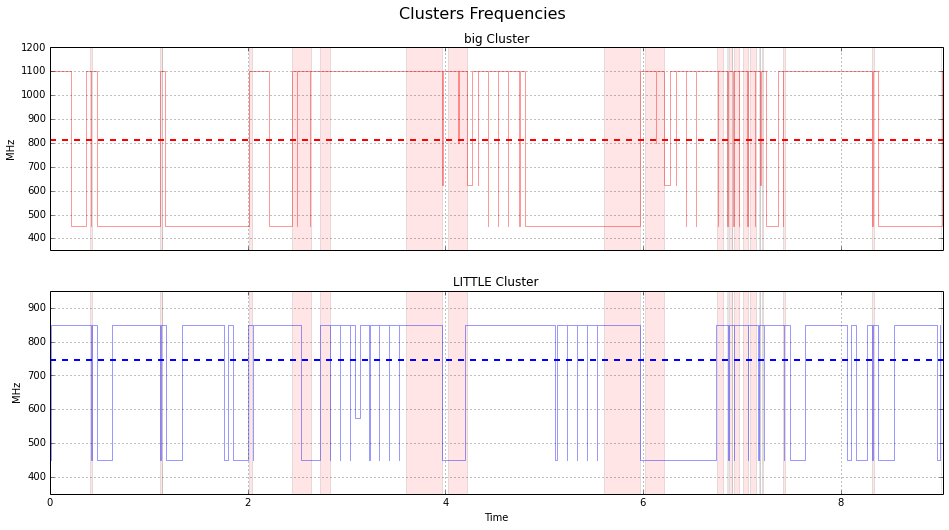

In [13]:
trace.analysis.frequency.plotClusterFrequencies()

## Assertions
These are the assertions used to generate pass/fail results s. They aren't very useful in this interactive context - it's much more interesting to examine plots like the one above and see whether the behaviour was desirable or not.

In [14]:
t.test_slack()

AssertionError: task task_wmig0 missed 25.0% of activations
	Check trace file: /home/brejac01/sources/lisa/results/20161221_154451/rtapp:energy_aware:wake_migration/1/trace.dat

In [ ]:
t.test_task_placement()